In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import unique

In [2]:
df = pd.read_csv('datasets/kc_house_dataset.csv')

In [3]:
df.shape

(21612, 21)

For fast local machine performance I am going to reduce the dataset size to 5000

In [4]:
df = df.head(5000)

In [5]:
df.shape

(5000, 21)

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
for d_col in df.columns:
    print(d_col, ': ', len(unique(df[d_col])))

id :  4962
date :  327
price :  1686
bedrooms :  10
bathrooms :  25
sqft_living :  540
sqft_lot :  3246
floors :  6
waterfront :  2
view :  5
condition :  5
grade :  11
sqft_above :  493
sqft_basement :  215
yr_built :  116
yr_renovated :  57
zipcode :  70
lat :  3041
long :  604
sqft_living15 :  428
sqft_lot15 :  3073


Lets drop `null` entities

In [8]:
df = df.dropna() # dropping null entities

Lets find out the best columns for model training using `sklearn ExtraTreesClassifier` 

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
Y = df['price']   # target column i.e price
X = df.drop(['id', 'date', 'price'], axis=1) # independent columns by dropping unnecessary column `id` and `date`

In [11]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

[0.04408917 0.05498161 0.08402631 0.08267755 0.02190918 0.00130136
 0.01358074 0.03597978 0.03627885 0.08405218 0.04379129 0.08097538
 0.00783233 0.06715459 0.08965255 0.08435251 0.08521495 0.08214967]


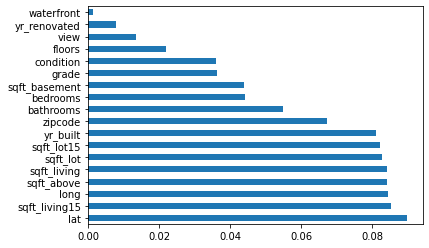

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X)).plot(kind='barh')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [17]:
prediction=reg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

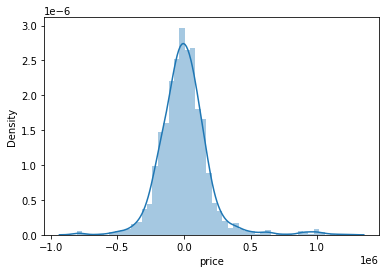

In [18]:
sns.distplot(Y_test-prediction)

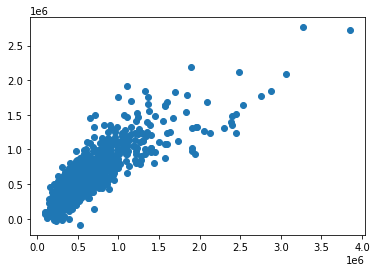

In [19]:
plt.scatter(Y_test, prediction)

In [20]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})

In [21]:
compare.head()

,Actual,Predicted
3566,299000,4.779641e+05
4252,170000,1.133893e+05
1918,640000,3.038195e+05
4111,649950,8.499038e+05
1471,1328000,1.006679e+06


In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(Y_test, prediction)

0.7274196825594316

In [24]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')